In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

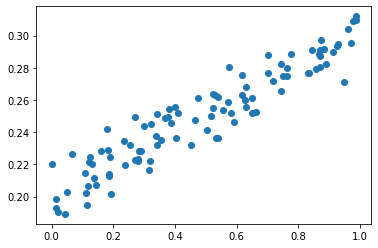

In [3]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + noise

plt.scatter(x_data,y_data)
plt.show()

In [4]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [7]:
x_data.shape, y_data.shape

((100, 1), (100, 1))

In [8]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [10]:
target.shape

torch.Size([100, 1])

In [11]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1,1)

    # 定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [12]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [8]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc.weight, param:Parameter containing:
tensor([[-0.9757]], requires_grad=True)
name:fc.bias, param:Parameter containing:
tensor([-0.6168], requires_grad=True)


In [13]:
for i in range(1001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 2.652944564819336
200 0.00016436559963040054
400 0.00010576478962320834
600 0.00010549357102718204
800 0.00010549230501055717
1000 0.00010549232683843002


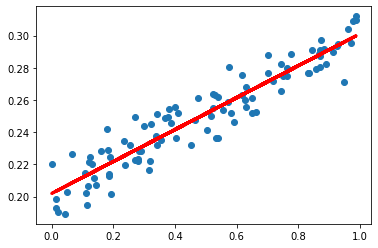

In [19]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()

In [17]:
y_pred.data.numpy()

array([[0.21396899],
       [0.29611272],
       [0.20834234],
       [0.28437757],
       [0.20344436],
       [0.27644637],
       [0.29818067],
       [0.21606621],
       [0.27754962],
       [0.21425913],
       [0.22507559],
       [0.25393265],
       [0.2845769 ],
       [0.2902829 ],
       [0.22064331],
       [0.24027827],
       [0.264587  ],
       [0.28833097],
       [0.2202072 ],
       [0.2420831 ],
       [0.29740372],
       [0.24149543],
       [0.2553864 ],
       [0.29891104],
       [0.22723362],
       [0.25543046],
       [0.22963025],
       [0.23009779],
       [0.2305646 ],
       [0.28554678],
       [0.28959984],
       [0.2880657 ],
       [0.24814193],
       [0.24274269],
       [0.22986117],
       [0.23593798],
       [0.23721656],
       [0.2149048 ],
       [0.23593979],
       [0.23977372],
       [0.25476915],
       [0.2127513 ],
       [0.21544568],
       [0.2467524 ],
       [0.28874645],
       [0.220963  ],
       [0.29395074],
       [0.275